1. import pandas as pd: Mengimpor library pandas untuk mengolah data.
2. pd.read_csv(): Fungsi ini membaca data dari file CSV
 (dataset_mitradarat_review.csv) dan menyimpannya dalam variabel data.
3. data.head(): Menampilkan 5 baris pertama dari data yang telah dibaca.

In [2]:
import pandas as pd
data = pd.read_csv("dataset_mitradarat_review.csv", sep = ',', encoding = 'latin1')
pd.set_option('display.max_colwidth', None)
data.head()

,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,Mohon perbaikan aplikasinya tidak dapat digunakan di handphone saya saat mau digunakan loading sedangkan di hanphone yg lain bisa mungkin bisa bantu jawab apakah ada oengaturan khususnya sehingga di hp saya tdk dapat mengakses aplikasi tersebut terima kasih
1,muhammad ubai,1,2024-10-01 04:04:58,"ini gimana nih, bis nya gak ke tracking, saya nunggu lama banget sampe saya kira libur, untuk location semua sudah nyala, tetap aja gak ke tracking"
2,Ra LG,3,2024-10-05 05:05:13,"Tolong untuk bus yang sedang tidak beroperasi diberi tanda atau ditampilkan juga di aplikasi, saya nunggu bus yang saya kira sudah dekat, ternyata busnya tidak bergerak karena mogok, jadi cukup membuang waktu"
3,Putu Gde,5,2024-09-20 00:40:08,"Aplikasinya bagus, ada penanda warna untuk tiap koridor. Tolong dibuatkan juga pilihan menu bahasa Inggris, dan perbanyak media sosialisasi di tempat strategis seperti bandara."
4,MUH IKBAL,3,2024-08-19 05:33:25,"Tolong aplikasinya diperbaiki, busnya sering tidak sesuai trayeknya dengan yg di lapangan. Bus diaplikasi kadang trayeknya dari A ke B, tp dilapangan malah B ke A. Khususnya teman bus makassar untuk trayek K5."


1. Fungsi casefolding:

def casefolding(text):: Ini adalah definisi sebuah fungsi bernama casefolding. Fungsi ini menerima satu argumen, yaitu text yang merepresentasikan sebuah teks.
text = text.lower(): Di dalam fungsi ini, kita mengubah semua huruf dalam teks text menjadi huruf kecil menggunakan metode .lower(). Hasil perubahan ini kemudian disimpan kembali ke variabel text.
return text: Setelah semua huruf diubah menjadi huruf kecil, fungsi akan mengembalikan teks yang sudah diubah tersebut.

2. Penerapan Fungsi pada Kolom content:

data['content'] = data['content'].apply(casefolding):
data['content']: Ini mengakses kolom content dalam DataFrame data. Kolom ini diasumsikan berisi teks-teks yang ingin kita ubah hurufnya menjadi kecil.
.apply(casefolding): Metode .apply() digunakan untuk menerapkan fungsi casefolding pada setiap elemen (baris) dalam kolom content. Artinya, fungsi casefolding akan dipanggil secara berulang untuk setiap teks dalam kolom tersebut.
data['content'] = ...: Hasil dari penerapan fungsi casefolding pada setiap baris kemudian disimpan kembali ke kolom content yang sama. Jadi, semua teks dalam kolom content sekarang sudah berubah menjadi huruf kecil.

3. data.head():

Setelah mengubah semua teks menjadi huruf kecil, baris kode data.head() digunakan untuk menampilkan 5 baris pertama dari DataFrame data yang sudah diubah. Ini berguna untuk memeriksa apakah proses perubahan huruf berhasil dan melihat hasilnya secara langsung.

In [3]:
def casefolding(text):
    text = text.lower()
    return text
data['content'] = data['content'].apply(casefolding)
pd.set_option('display.max_colwidth', None)
data.head()

,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,mohon perbaikan aplikasinya tidak dapat digunakan di handphone saya saat mau digunakan loading sedangkan di hanphone yg lain bisa mungkin bisa bantu jawab apakah ada oengaturan khususnya sehingga di hp saya tdk dapat mengakses aplikasi tersebut terima kasih
1,muhammad ubai,1,2024-10-01 04:04:58,"ini gimana nih, bis nya gak ke tracking, saya nunggu lama banget sampe saya kira libur, untuk location semua sudah nyala, tetap aja gak ke tracking"
2,Ra LG,3,2024-10-05 05:05:13,"tolong untuk bus yang sedang tidak beroperasi diberi tanda atau ditampilkan juga di aplikasi, saya nunggu bus yang saya kira sudah dekat, ternyata busnya tidak bergerak karena mogok, jadi cukup membuang waktu"
3,Putu Gde,5,2024-09-20 00:40:08,"aplikasinya bagus, ada penanda warna untuk tiap koridor. tolong dibuatkan juga pilihan menu bahasa inggris, dan perbanyak media sosialisasi di tempat strategis seperti bandara."
4,MUH IKBAL,3,2024-08-19 05:33:25,"tolong aplikasinya diperbaiki, busnya sering tidak sesuai trayeknya dengan yg di lapangan. bus diaplikasi kadang trayeknya dari a ke b, tp dilapangan malah b ke a. khususnya teman bus makassar untuk trayek k5."


Mendefinisikan sebuah fungsi Python bernama `cleansing` yang bertujuan untuk membersihkan teks dari karakter-karakter yang tidak diinginkan. Fungsi ini akan menerima sebuah teks sebagai input dan mengembalikan teks yang sudah dibersihkan.

**Proses Pembersihan Teks:**

1. **Menghapus Spasi di Awal dan Akhir:**
   ```python
   text = text.strip(" ")
   ```
   Baris kode ini menghapus semua spasi di awal dan akhir teks. Jadi, jika ada teks seperti "  Hello, world!  ", setelah dibersihkan akan menjadi "Hello, world!".

2. **Menghapus Tanda Baca:**
   ```python
   text = re.sub(r'[?|$|.|!_:")(-+,]', '', text)
   ```
   Baris ini menggunakan ekspresi reguler (regular expression) untuk mencari dan menghapus semua tanda baca yang termasuk dalam tanda kurung siku. Tanda baca-tanda baca tersebut akan diganti dengan string kosong (''), sehingga seolah-olah dihapus dari teks.

3. **Menghapus Angka:**
   ```python
   text = re.sub(r'\d+', '', text)
   ```
   Ekspresi reguler ini digunakan untuk mencari dan menghapus semua angka (digit) dalam teks.

4. **Menghapus Kata Tunggal:**
   ```python
   text = re.sub(r"\b[a-zA-Z]\b", "", text)
   ```
   Ekspresi reguler ini mencari kata-kata yang hanya terdiri dari satu huruf (baik huruf besar maupun huruf kecil). Kata-kata tunggal ini kemudian dihapus.

5. **Menghapus Spasi Berlebih:**
   ```python
   text = re.sub('\s+',' ', text)
   ```
   Ekspresi reguler ini mengganti semua urutan spasi (satu atau lebih spasi berurutan) dengan hanya satu spasi. Jadi, jika ada teks dengan banyak spasi di antara kata, spasi tersebut akan digabungkan menjadi satu spasi.

**Menerapkan Fungsi pada DataFrame:**

```python
data['content'] = data['content'].apply(cleansing)
```

Baris kode ini menerapkan fungsi `cleansing` pada setiap elemen (baris) dalam kolom `content` dari DataFrame `data`. Hasil pembersihan teks kemudian disimpan kembali ke kolom `content`.




In [4]:
import re
def cleansing(text):
    text = text.strip(" ")
    text = re.sub(r'[?|$|.|!_:")(-+,]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = re.sub('\s+',' ', text)
    return text
data['content'] = data['content'].apply(cleansing)
pd.set_option('display.max_colwidth', None)
data.head()

,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,mohon perbaikan aplikasinya tidak dapat digunakan di handphone saya saat mau digunakan loading sedangkan di hanphone yg lain bisa mungkin bisa bantu jawab apakah ada oengaturan khususnya sehingga di hp saya tdk dapat mengakses aplikasi tersebut terima kasih
1,muhammad ubai,1,2024-10-01 04:04:58,ini gimana nih bis nya gak ke tracking saya nunggu lama banget sampe saya kira libur untuk location semua sudah nyala tetap aja gak ke tracking
2,Ra LG,3,2024-10-05 05:05:13,tolong untuk bus yang sedang tidak beroperasi diberi tanda atau ditampilkan juga di aplikasi saya nunggu bus yang saya kira sudah dekat ternyata busnya tidak bergerak karena mogok jadi cukup membuang waktu
3,Putu Gde,5,2024-09-20 00:40:08,aplikasinya bagus ada penanda warna untuk tiap koridor tolong dibuatkan juga pilihan menu bahasa inggris dan perbanyak media sosialisasi di tempat strategis seperti bandara
4,MUH IKBAL,3,2024-08-19 05:33:25,tolong aplikasinya diperbaiki busnya sering tidak sesuai trayeknya dengan yg di lapangan bus diaplikasi kadang trayeknya dari ke tp dilapangan malah ke khususnya teman bus makassar untuk trayek


**Penjelasan:**

Kode ini menggunakan library NLTK (Natural Language Toolkit) untuk memecah teks menjadi kata-kata individu (token). Berikut penjelasan langkah demi langkah:

1. **Mengimpor NLTK:**
   ```python
   import nltk
   ```
   Baris ini mengimpor library NLTK yang menyediakan berbagai alat untuk pemrosesan bahasa alami.

2. **Mengunduh Sumber Daya:**
   ```python
   nltk.download('punkt')
   ```
   Baris ini mengunduh sumber daya "punkt" dari NLTK. Sumber daya ini berisi model yang sudah dilatih untuk memisahkan teks menjadi kata-kata berdasarkan aturan bahasa.

3. **Mengimpor Fungsi Tokenisasi:**
   ```python
   from nltk.tokenize import word_tokenize
   ```
   Baris ini mengimpor fungsi `word_tokenize` dari modul `tokenize` dalam NLTK. Fungsi ini akan digunakan untuk memecah teks menjadi kata-kata.

4. **Mendefinisikan Fungsi Wrapper (Opsional):**
   ```python
   def word_tokenize_wrapper(text):
       return word_tokenize(text)
   ```
   Fungsi `word_tokenize_wrapper` ini sebenarnya opsional. Fungsi ini hanya memanggil fungsi `word_tokenize` dari NLTK. Fungsi wrapper ini dibuat untuk memudahkan dalam pemanggilan fungsi `word_tokenize` nantinya.

5. **Menerapkan Tokenisasi pada DataFrame:**
   ```python
   data['content'] = data['content'].apply(word_tokenize_wrapper)
   ```
   Baris ini menerapkan fungsi `word_tokenize_wrapper` (atau `word_tokenize` secara langsung) pada setiap elemen (baris) dalam kolom `content` dari DataFrame `data`. Hasil dari proses tokenisasi (daftar kata) akan disimpan kembali ke kolom `content`.

6. **Melihat Hasil (Opsional):**
   ```python
   data.head()
   ```
   Baris ini menampilkan beberapa baris pertama dari DataFrame `data` setelah proses tokenisasi. Hal ini berguna untuk memeriksa apakah proses tokenisasi berhasil dan melihat hasil dalam bentuk daftar kata.

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['content'] = data['content'].apply(word_tokenize_wrapper)
pd.set_option('display.max_colwidth', None)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,"[mohon, perbaikan, aplikasinya, tidak, dapat, digunakan, di, handphone, saya, saat, mau, digunakan, loading, sedangkan, di, hanphone, yg, lain, bisa, mungkin, bisa, bantu, jawab, apakah, ada, oengaturan, khususnya, sehingga, di, hp, saya, tdk, dapat, mengakses, aplikasi, tersebut, terima, kasih]"
1,muhammad ubai,1,2024-10-01 04:04:58,"[ini, gimana, nih, bis, nya, gak, ke, tracking, saya, nunggu, lama, banget, sampe, saya, kira, libur, untuk, location, semua, sudah, nyala, tetap, aja, gak, ke, tracking]"
2,Ra LG,3,2024-10-05 05:05:13,"[tolong, untuk, bus, yang, sedang, tidak, beroperasi, diberi, tanda, atau, ditampilkan, juga, di, aplikasi, saya, nunggu, bus, yang, saya, kira, sudah, dekat, ternyata, busnya, tidak, bergerak, karena, mogok, jadi, cukup, membuang, waktu]"
3,Putu Gde,5,2024-09-20 00:40:08,"[aplikasinya, bagus, ada, penanda, warna, untuk, tiap, koridor, tolong, dibuatkan, juga, pilihan, menu, bahasa, inggris, dan, perbanyak, media, sosialisasi, di, tempat, strategis, seperti, bandara]"
4,MUH IKBAL,3,2024-08-19 05:33:25,"[tolong, aplikasinya, diperbaiki, busnya, sering, tidak, sesuai, trayeknya, dengan, yg, di, lapangan, bus, diaplikasi, kadang, trayeknya, dari, ke, tp, dilapangan, malah, ke, khususnya, teman, bus, makassar, untuk, trayek]"


**Penjelasan Detail:**

Kode di atas bertujuan untuk menghapus kata-kata stopword dari teks dalam bahasa Indonesia dan (opsional) bahasa Inggris. Kata stopword adalah kata-kata yang sering muncul dalam teks tetapi tidak memberikan banyak informasi penting, seperti "dan", "atau", "yang", "saya", dll.

**Langkah-langkah:**

1. **Import Library:**
   * `import nltk`: Mengimpor library NLTK untuk pemrosesan bahasa alami.
   * `from nltk.corpus import stopwords`: Mengimpor modul `stopwords` dari NLTK yang berisi daftar kata-kata stopword untuk berbagai bahasa.
   * `import pandas as pd`: Mengimpor library Pandas untuk manipulasi data (digunakan untuk membaca file CSV berisi stopword kustom).

2. **Membaca Stopword Kustom (Opsional):**
   * `sw = pd.read_csv("stopwordbahasa.csv", header=None)[0].tolist()`: Membaca file CSV berisi daftar stopword bahasa Indonesia kustom. Daftar kata ini akan digabungkan dengan daftar stopword bawaan NLTK.

3. **Memuat Daftar Stopword:**
   * `indonesian_stopwords = stopwords.words('indonesian')`: Memuat daftar stopword bahasa Indonesia yang sudah ada di NLTK.
   * `english_stopwords = stopwords.words('english')`: Memuat daftar stopword bahasa Inggris (opsional, jika diperlukan).

4. **Menggabungkan Daftar Stopword:**
   * `combined_stopwords = indonesian_stopwords + english_stopwords + sw`: Menggabungkan semua daftar stopword menjadi satu daftar.

5. **Fungsi Penghapusan Stopword:**
   * `def stopword_removal(tokens):`: Mendefinisikan fungsi `stopword_removal` yang menerima daftar kata sebagai input.
   * `filtered_words = [word for word in tokens if word not in combined_stopwords]`: Mengiterasi setiap kata dalam daftar input. Jika kata tersebut tidak ada dalam daftar stopword, maka kata tersebut akan dimasukkan ke dalam daftar `filtered_words`.

6. **Menerapkan pada DataFrame:**
   * `data['content'] = data['content'].apply(stopword_removal)`: Menerapkan fungsi `stopword_removal` pada setiap baris di kolom `content` dari DataFrame `data`. Hasilnya adalah kolom `content` yang berisi teks tanpa kata-kata stopword.


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd

sw = pd.read_csv("stopwordbahasa.csv", header=None)[0].tolist()

def stopword_removal(tokens):
    indonesian_stopwords = stopwords.words('indonesian')
    english_stopwords = stopwords.words('english')

    combined_stopwords = indonesian_stopwords + english_stopwords + sw

    filtered_words = [word for word in tokens if word not in combined_stopwords]

    return filtered_words

data['content'] = data['content'].apply(stopword_removal)
pd.set_option('display.max_colwidth', None)
data.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,"[mohon, perbaikan, aplikasinya, handphone, loading, hanphone, yg, bantu, oengaturan, hp, tdk, mengakses, aplikasi, terima, kasih]"
1,muhammad ubai,1,2024-10-01 04:04:58,"[gimana, nih, bis, nya, gak, tracking, nunggu, banget, sampe, libur, location, nyala, aja, gak, tracking]"
2,Ra LG,3,2024-10-05 05:05:13,"[tolong, bus, beroperasi, tanda, ditampilkan, aplikasi, nunggu, bus, busnya, bergerak, mogok, membuang]"
3,Putu Gde,5,2024-09-20 00:40:08,"[aplikasinya, bagus, penanda, warna, koridor, tolong, dibuatkan, pilihan, menu, bahasa, inggris, perbanyak, media, sosialisasi, strategis, bandara]"
4,MUH IKBAL,3,2024-08-19 05:33:25,"[tolong, aplikasinya, diperbaiki, busnya, sesuai, trayeknya, yg, lapangan, bus, diaplikasi, kadang, trayeknya, tp, dilapangan, teman, bus, makassar, trayek]"


**Penjelasan Detail:**

Kode di atas melakukan proses *stemming* pada teks berbahasa Indonesia menggunakan library Sastrawi. *Stemming* adalah proses mengubah kata menjadi bentuk dasarnya (akar kata) dengan menghilangkan imbuhan seperti awalan, akhiran, dan sisipan. Tujuannya adalah untuk mengurangi variasi bentuk kata sehingga memudahkan dalam analisis teks.

**Langkah-langkah:**

1. **Instalasi Sastrawi:**
   * `! pip install Sastrawi`: Menginstal library Sastrawi yang khusus dirancang untuk pemrosesan bahasa alami bahasa Indonesia.

2. **Import Modul:**
   * `from sklearn.pipeline import Pipeline`: Mengimpor modul `Pipeline` dari scikit-learn (meskipun tidak digunakan secara langsung dalam kode ini, modul ini berguna untuk membuat rangkaian proses pemrosesan teks).
   * `from Sastrawi.Stemmer.StemmerFactory import StemmerFactory`: Mengimpor kelas `StemmerFactory` dari Sastrawi. Kelas ini digunakan untuk membuat objek stemmer.

3. **Fungsi Stemming:**
   * `def stemming(text):`: Mendefinisikan fungsi `stemming` yang menerima sebuah daftar kata sebagai input.
   * `factory = StemmerFactory()`: Membuat objek `factory` untuk membuat stemmer.
   * `stemmer = factory.create_stemmer()`: Membuat objek `stemmer` yang akan digunakan untuk melakukan stemming.
   * Loop `for` digunakan untuk mengiterasi setiap kata dalam daftar input.
   * `dt = stemmer.stem(w)`: Melakukan stemming pada kata `w` dan menyimpan hasil stemming dalam variabel `dt`.
   * `do.append(dt)`: Menambahkan kata yang sudah di-stemming ke dalam daftar `do`.
   * `d_clean = " ".join(do)`: Menggabungkan semua kata yang sudah di-stemming menjadi satu string.
   * `return d_clean`: Mengembalikan string yang sudah di-stemming.

4. **Menerapkan Stemming pada DataFrame:**
   * `data['content'] = data['content'].apply(stemming)`: Menerapkan fungsi `stemming` pada setiap baris di kolom `content` dari DataFrame `data`. Hasilnya adalah kolom `content` yang berisi teks yang sudah di-stemming.

5. **Menyimpan Data (Opsional):**
   * `data.to_csv('mitradaratbersih.csv', index=False)`: Menyimpan DataFrame yang sudah diproses ke dalam file CSV dengan nama `mitradaratbersih.csv`.

6. **Membaca Data yang Sudah Disimpan (Opsional):**
   * `data_clean = pd.read_csv('mitradaratbersih.csv', encoding='latin1')`: Membaca file CSV yang sudah disimpan ke dalam DataFrame baru.



In [7]:
# proses stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['content'] = data['content'].apply(stemming)

data.to_csv('mitradaratbersih.csv', index=False)
data_clean = pd.read_csv('mitradaratbersih.csv', encoding='latin1')
pd.set_option('display.max_colwidth', None)
data_clean.head()

mohon baik aplikasi handphone loading hanphone yg bantu oengaturan hp tdk akses aplikasi terima kasih
gimana nih bis nya gak tracking nunggu banget sampe libur location nyala aja gak tracking
tolong bus operasi tanda tampil aplikasi nunggu bus bus gerak mogok buang
aplikasi bagus tanda warna koridor tolong buat pilih menu bahasa inggris banyak media sosialisasi strategis bandara
tolong aplikasi baik bus sesuai trayek yg lapang bus aplikasi kadang trayek tp lapang teman bus makassar trayek
senang bantu dg apk utk tracking udah lot akses realtime trackingnya kaya masalah deh bis gerak maju mundur bis udah tinggal bis mohon baik nya ya
aplikasi bantu pantau bis letak henti tinggal bus tau estimasi hilang yaa
blum jalan gps tracking ny balikpapan tunggu updatenya saran kalo bayar -wallet bagus
jam gps nya gak jalan aplikasi teman bus banyumas gak mastiin aplikasi nya min
bug gak masuk aplikasi masuk loading banget gak masuk masuk
bagus aplikasi fleksibel disabilitas lihat tolong tambah men

,userName,score,at,content
0,Grace A,1,2024-09-09 02:49:22,mohon baik aplikasi handphone loading hanphone yg bantu oengaturan hp tdk akses aplikasi terima kasih
1,muhammad ubai,1,2024-10-01 04:04:58,gimana nih bis nya gak tracking nunggu banget sampe libur location nyala aja gak tracking
2,Ra LG,3,2024-10-05 05:05:13,tolong bus operasi tanda tampil aplikasi nunggu bus bus gerak mogok buang
3,Putu Gde,5,2024-09-20 00:40:08,aplikasi bagus tanda warna koridor tolong buat pilih menu bahasa inggris banyak media sosialisasi strategis bandara
4,MUH IKBAL,3,2024-08-19 05:33:25,tolong aplikasi baik bus sesuai trayek yg lapang bus aplikasi kadang trayek tp lapang teman bus makassar trayek


**Penjelasan:**

Kode ini berfungsi untuk memberikan label sentimen ("negatif" atau "positif") pada data berdasarkan nilai skor yang diberikan. Mari kita uraikan langkah demi langkah:

1. **Fungsi `assign_sentiment_label`:**
   * Fungsi ini menerima nilai `score` sebagai input.
   * Jika nilai `score` kurang dari 4, maka fungsi akan mengembalikan label "negatif".
   * Jika tidak (nilai `score` sama dengan atau lebih dari 4), maka fungsi akan mengembalikan label "positif".
   * Sederhananya, fungsi ini membagi data menjadi dua kategori berdasarkan nilai ambang batas 4.

2. **Menerapkan Fungsi pada DataFrame:**
   * `data['sentiment_label'] = data['score'].apply(assign_sentiment_label)`:
     * Baris kode ini menerapkan fungsi `assign_sentiment_label` pada setiap nilai dalam kolom `score` dari DataFrame `data`.
     * Hasil dari fungsi ini (yaitu label "negatif" atau "positif") akan disimpan dalam kolom baru yang bernama `sentiment_label`.

3. **Menyimpan Data (Opsional):**
   * `data.to_csv('mitradaratbersihdanlabel.csv', index=False)`:
     * Menyimpan DataFrame `data` yang sudah ditambahkan kolom `sentiment_label` ke dalam file CSV dengan nama `mitradaratbersihdanlabel.csv`.

4. **Membaca Data yang Sudah Disimpan (Opsional):**
   * `data_sentimen = pd.read_csv('mitradaratbersihdanlabel.csv', encoding='latin1')`:
     * Membaca file CSV yang baru saja disimpan ke dalam DataFrame baru yang bernama `data_sentimen`.

In [8]:
def assign_sentiment_label(score):
    if score < 4:
        return 'negatif'
    else:
        return 'positif'

data['sentiment_label'] = data['score'].apply(assign_sentiment_label)

data.to_csv('mitradaratbersihdanlabel.csv', index=False)
data_sentimen = pd.read_csv('mitradaratbersihdanlabel.csv', encoding='latin1')
data_sentimen.head()

,userName,score,at,content,sentiment_label
0,Grace A,1,2024-09-09 02:49:22,mohon baik aplikasi handphone loading hanphone yg bantu oengaturan hp tdk akses aplikasi terima kasih,negatif
1,muhammad ubai,1,2024-10-01 04:04:58,gimana nih bis nya gak tracking nunggu banget sampe libur location nyala aja gak tracking,negatif
2,Ra LG,3,2024-10-05 05:05:13,tolong bus operasi tanda tampil aplikasi nunggu bus bus gerak mogok buang,negatif
3,Putu Gde,5,2024-09-20 00:40:08,aplikasi bagus tanda warna koridor tolong buat pilih menu bahasa inggris banyak media sosialisasi strategis bandara,positif
4,MUH IKBAL,3,2024-08-19 05:33:25,tolong aplikasi baik bus sesuai trayek yg lapang bus aplikasi kadang trayek tp lapang teman bus makassar trayek,negatif


**Penjelasan:**

Kode di atas digunakan untuk mengubah teks menjadi representasi numerik yang dapat dipahami oleh mesin, menggunakan teknik **TF-IDF** (Term Frequency-Inverse Document Frequency). Ini adalah langkah penting dalam banyak tugas pemrosesan bahasa alami (Natural Language Processing/NLP).

**Mari kita uraikan langkah demi langkah:**

1. **Import Modul:**
   * `from sklearn.feature_extraction.text import CountVectorizer`: Mengimpor kelas `CountVectorizer` dari scikit-learn. Kelas ini digunakan untuk menghitung frekuensi kemunculan setiap kata dalam setiap dokumen.
   * `from sklearn.feature_extraction.text import TfidfVectorizer`: Mengimpor kelas `TfidfVectorizer` dari scikit-learn. Kelas ini digunakan untuk menghitung bobot TF-IDF untuk setiap kata dalam setiap dokumen.

2. **Membuat Count Vectorizer:**
   * `vectorizer = CountVectorizer()`: Membuat objek `vectorizer` dari kelas `CountVectorizer`. Objek ini akan digunakan untuk menghitung frekuensi kata.

3. **Mengubah Teks Menjadi Vektor:**
   * `X = vectorizer.fit_transform(data_clean['content'].astype('U'))`:
     * `data_clean['content'].astype('U')`: Mengubah kolom 'content' dalam DataFrame `data_clean` menjadi tipe data Unicode (untuk memastikan konsistensi).
     * `vectorizer.fit_transform(data)`: Melatih `vectorizer` pada data teks dan mengubahnya menjadi matriks. Setiap baris dalam matriks mewakili satu dokumen, dan setiap kolom mewakili satu kata unik. Nilai dalam matriks menunjukkan frekuensi kemunculan kata dalam dokumen.

4. **Membuat TF-IDF Vectorizer:**
   * `tf = TfidfVectorizer()`: Membuat objek `tf` dari kelas `TfidfVectorizer`. Objek ini akan digunakan untuk menghitung bobot TF-IDF.

5. **Mengubah Teks Menjadi Vektor TF-IDF:**
   * `text_tf = tf.fit_transform(data_clean['content'].astype('U'))`:
     * Sama seperti langkah sebelumnya, tetapi kali ini menggunakan `TfidfVectorizer` untuk menghitung bobot TF-IDF. Bobot TF-IDF memberikan bobot yang lebih tinggi pada kata-kata yang jarang muncul dalam seluruh kumpulan dokumen tetapi sering muncul dalam dokumen tertentu.

In [9]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['content'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['content'].astype('U'))
print(text_tf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 11187 stored elements and shape (1907, 2350)>
  Coords	Values
  (0, 1401)	0.23089444415058796
  (0, 144)	0.22011714991610282
  (0, 93)	0.2691297274629883
  (0, 741)	0.37114336972683815
  (0, 1171)	0.267400814675002
  (0, 742)	0.37114336972683815
  (0, 2344)	0.18324161979773645
  (0, 175)	0.14793847019457756
  (0, 1573)	0.37114336972683815
  (0, 776)	0.2729619726862456
  (0, 2093)	0.2729619726862456
  (0, 36)	0.23467368232813784
  (0, 2116)	0.21134846444787675
  (0, 942)	0.19193831703545225
  (1, 643)	0.20887626695343173
  (1, 1517)	0.2338227104729111
  (1, 263)	0.21448859583616756
  (1, 1540)	0.15233105284339873
  (1, 613)	0.3215411323210962
  (1, 2181)	0.4639721751506905
  (1, 1535)	0.24948357931452297
  (1, 163)	0.19779774673140488
  (1, 1839)	0.23985401472883344
  (1, 1157)	0.33922005840988234
  (1, 1173)	0.33922005840988234
  :	:
  (1887, 1261)	1.0
  (1888, 1579)	1.0
  (1889, 2117)	1.0
  (1890, 1253)	1.0
  (1891, 135)	1.

**Penjelasan:**

Kode di atas bertujuan untuk mengambil data dari DataFrame `data_sentimen` yang sudah ada, lalu membuat DataFrame baru dengan struktur kolom yang spesifik, dan kemudian menyimpan DataFrame baru tersebut ke dalam file CSV.

**Mari kita uraikan langkah demi langkah:**

1. **Mengimpor Pandas:**
   * `import pandas as pd`: Baris ini mengimpor library Pandas yang sangat berguna untuk manipulasi dan analisis data. Pandas menyediakan struktur data seperti DataFrame yang mirip dengan tabel dalam database.

2. **Mendefinisikan Nama Kolom:**
   * `header = ['userName', 'content', 'sentiment_label']`: Di sini, kita membuat sebuah list `header` yang berisi nama-nama kolom yang akan digunakan dalam DataFrame baru. Jadi, DataFrame baru kita akan memiliki tiga kolom: `userName`, `content`, dan `sentiment_label`.

3. **Membuat DataFrame Baru:**
   * `df = pd.DataFrame(data, columns=header)`:
     * `pd.DataFrame()`: Fungsi ini digunakan untuk membuat objek DataFrame baru.
     * `data`: Argumen ini berisi data yang akan dimasukkan ke dalam DataFrame baru. Dalam hal ini, data diambil dari DataFrame `data_sentimen` yang sudah ada.
     * `columns=header`: Argumen ini menentukan nama-nama kolom yang akan digunakan. Nama-nama kolom ini diambil dari list `header` yang sudah kita definisikan sebelumnya.

4. **Menyimpan DataFrame ke CSV:**
   * `df.to_csv('mitradarat.csv', index=False)`:
     * `df.to_csv()`: Metode ini digunakan untuk menyimpan DataFrame `df` ke dalam file CSV.
     * `'mitradarat.csv'`: Ini adalah nama file CSV yang akan dibuat. Data dalam DataFrame akan disimpan dalam format CSV dengan nama file ini.
     * `index=False`: Argumen ini digunakan untuk mencegah indeks baris dalam DataFrame disimpan sebagai kolom tambahan dalam file CSV. Jadi, hanya data dalam kolom yang akan disimpan.

In [10]:
import pandas as pd

header = ['userName', 'content', 'sentiment_label']
data = data_sentimen
df = pd.DataFrame(data, columns=header)
df.to_csv('mitradarat.csv', index=False)

## Memahami Pembagian Data untuk Pembelajaran Mesin

Kode di atas melakukan pembagian data menjadi dua bagian utama: **data latih** (training data) dan **data uji** (testing data). Pembagian ini adalah langkah yang sangat penting dalam proses membangun model pembelajaran mesin.

### Impor Modul yang Dibutuhkan
```python
import collections, numpy
from sklearn.model_selection import train_test_split
```
* **collections:** Modul ini menyediakan container untuk mengorganisasi data, seperti counter untuk menghitung frekuensi.
* **numpy:** Modul ini menyediakan fungsi untuk operasi numerik pada array.
* **sklearn.model_selection:** Modul ini menyediakan fungsi untuk memisahkan data menjadi data latih dan data uji.

### Membagi Data
```python
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment_label'], test_size=0.2, random_state=33)
```
* **text_tf:** Ini adalah data fitur yang sudah diubah menjadi representasi numerik (misalnya, menggunakan TF-IDF).
* **data['sentiment_label']:** Ini adalah label atau target yang ingin kita prediksi (dalam hal ini, sentimen positif atau negatif).
* **train_test_split:** Fungsi ini dari scikit-learn membagi data menjadi data latih dan data uji.
  * **X_train:** Fitur-fitur untuk data latih.
  * **X_test:** Fitur-fitur untuk data uji.
  * **y_train:** Label untuk data latih.
  * **y_test:** Label untuk data uji.
  * **test_size=0.2:** Artinya 20% dari data akan digunakan sebagai data uji, dan sisanya (80%) sebagai data latih.
  * **random_state=33:** Ini digunakan untuk mengatur random seed, sehingga pembagian data akan selalu sama jika kode dijalankan ulang dengan nilai random_state yang sama.

### Menghitung Jumlah Data
```python
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)
```
Baris kode ini mencetak jumlah data uji dan data latih.

### Menghitung Jumlah Data Berdasarkan Sentimen
```python
pos = (y_test == 'positif').sum()
neg = (y_test == 'negatif').sum()
postrain = (y_train == 'positif').sum()
negtrain = (y_train == 'negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
```
Bagian kode ini menghitung jumlah data uji dan data latih yang memiliki sentimen positif dan negatif.

### Menampilkan Distribusi Sentimen
```python
data['sentiment_label'].value_counts()
```
Baris kode ini menghitung jumlah kemunculan setiap label sentimen dalam data asli.


In [24]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment_label'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positif').sum()
neg = (y_test == 'negatif').sum()
postrain = (y_train == 'positif').sum()
negtrain = (y_train == 'negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data['sentiment_label'].value_counts()

Jumlah Data Uji: (382, 2350)
Jumlah Data Latih: (1525, 2350)
Jumlah data uji dengan sentimen positif: 242
Jumlah data uji dengan sentimen negatif: 140
Jumlah data latih dengan sentimen positif: 962
Jumlah data latih dengan sentimen negatif: 563


sentiment_label
positif    1204
negatif     703
Name: count, dtype: int64

In [26]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment_label'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positif').sum()
neg = (y_test == 'negatif').sum()
postrain = (y_train == 'positif').sum()
negtrain = (y_train == 'negatif').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data['sentiment_label'].value_counts()

Jumlah Data Uji: (573, 2350)
Jumlah Data Latih: (1334, 2350)
Jumlah data uji dengan sentimen positif: 359
Jumlah data uji dengan sentimen negatif: 214
Jumlah data latih dengan sentimen positif: 845
Jumlah data latih dengan sentimen negatif: 489


sentiment_label
positif    1204
negatif     703
Name: count, dtype: int64

## Penjelasan Kode Klasifikasi Sentimen dengan Oversampling dan Evaluasi

Kode tersebut berfokus pada klasifikasi sentimen teks dengan menangani ketidakseimbangan kelas dan mengevaluasi performa model. Mari kita bahas langkah demi langkah:

**1. Impor Modul:**

- Berbagai modul diimpor untuk menangani pembagian data, oversampling, klasifikasi, evaluasi metrik, dan lainnya.

**2. Membagi Data (train_test_split):**

- Data dibagi menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan perbandingan 30% untuk data uji dan 70% untuk data latih.

**3. Penanganan Ketidakseimbangan Kelas:**

  **3.1 SMOTE (Synthetic Minority Oversampling Technique):**
    - SMOTE digunakan untuk mengatasi ketidakseimbangan kelas.
    - `smote` objek dibuat dengan `random_state=42` untuk memastikan replikasi data minoritas dapat direproduksi.
    - `smote.fit_resample` digunakan untuk menghasilkan data minoritas sintetis, menyeimbangkan distribusi kelas.
    - `X_resampled` dan `y_resampled` berisi data yang telah dioverampling dengan SMOTE.

  **3.2 SMOTE-ENN (SMOTE and Edited Nearest Neighbors):**
    - SMOTE-ENN diterapkan pada data yang sudah dioverampling dengan SMOTE.
    - `smote_enn` objek dibuat dengan `random_state=42` untuk konsistensi.
    - `smote_enn.fit_resample` digunakan untuk lebih lanjut meningkatkan kualitas data yang dioverampling dengan menghilangkan noise potensial.
    - `X_resampled_enn` dan `y_resampled_enn` berisi data yang telah dioverampling dengan SMOTE-ENN.

**4. Pelatihan Model SVM:**

  **4.1 Model dengan SMOTE:**
    - `clf_smote` objek dibuat, menggunakan Support Vector Machine (SVM) dengan kernel linear.
    - `clf_smote.fit(X_resampled, y_resampled)` melatih model dengan data yang dioverampling dengan SMOTE.

  **4.2 Model dengan SMOTE-ENN:**
    - `clf_smote_enn` objek dibuat, juga menggunakan SVM dengan kernel linear.
    - `clf_smote_enn.fit(X_resampled_enn, y_resampled_enn)` melatih model dengan data yang dioverampling dengan SMOTE-ENN.

**5. Cross-Validation (cross_val_score):**

  **5.1 Model dengan SMOTE:**
    - `cross_val_score` digunakan untuk mengevaluasi performa model `clf_smote` dengan k-fold cross-validation (k=5).
    - Hasil disimpan di `cv_scores_smote`.
    - Akurasi rata-rata cross-validation dicetak.

  **5.2 Model dengan SMOTE-ENN:**
    - Proses serupa dilakukan untuk mengevaluasi `clf_smote_enn` dengan cross-validation.
    - Hasil disimpan di `cv_scores_smote_enn`.
    - Akurasi rata-rata cross-validation dicetak.

**6. Pengujian Klasifikasi:**

  **6.1 Model dengan SMOTE:**
    - `predicted_smote` berisi hasil prediksi model `clf_smote` pada data uji `X_test`.

  **6.2 Model dengan SMOTE-ENN:**
    - `predicted_smote_enn` berisi hasil prediksi model `clf_smote_enn` pada data uji `X_test`.

**7. Evaluasi Model (confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score):**

  **7.1 Model dengan SMOTE:**
    - Confusion matrix, classification report, akurasi, presisi, recall, dan F1 score dicetak untuk mengevaluasi performa model `clf_smote` pada data uji.

  **7.2 Model dengan SMOTE-ENN:**
    - Evaluasi serupa dilakukan untuk model `clf_smote_enn` dengan data uji.

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment_label'], test_size=0.3, random_state=33)

# 1. Pelatihan Model SVM
# 1.1 Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 1.2 Menerapkan SMOTE-ENN pada data yang telah diseimbangkan oleh SMOTE
smote_enn = SMOTEENN(random_state=42)
X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(X_resampled, y_resampled)

# Melatih model SVM dengan data yang diseimbangkan oleh SMOTE
clf_smote = SVC(kernel='linear')
clf_smote.fit(X_resampled, y_resampled)

# Melatih model SVM dengan data yang diseimbangkan oleh SMOTE-ENN
clf_smote_enn = SVC(kernel='linear')
clf_smote_enn.fit(X_resampled_enn, y_resampled_enn)

# 2. Cross-Validation
# 2.1 Cross-Validation untuk model SMOTE
cv_scores_smote = cross_val_score(clf_smote, X_resampled, y_resampled, cv=5)
print("SMOTE")
print("Cross-Validation Scores with SMOTE:", cv_scores_smote)
print("Mean CV Accuracy with SMOTE:", np.mean(cv_scores_smote))

# 2.2 Cross-Validation untuk model SMOTE-ENN
cv_scores_smote_enn = cross_val_score(clf_smote_enn, X_resampled_enn, y_resampled_enn, cv=5)
print("------------------------------------------------------------------------------------------------------------------------------")
print("SMOTE-ENN")
print("Cross-Validation Scores with SMOTE-ENN:", cv_scores_smote_enn)
print("Mean CV Accuracy with SMOTE-ENN:", np.mean(cv_scores_smote_enn))

# 3. Pengujian Klasifikasi
# 3.1 Memprediksi hasil dengan model SMOTE
predicted_smote = clf_smote.predict(X_test)

# 3.2 Memprediksi hasil dengan model SMOTE-ENN
predicted_smote_enn = clf_smote_enn.predict(X_test)

# 4. Evaluasi Model
# 4.1 Evaluasi untuk model SMOTE
print("\nHasil Klasifikasi dengan SMOTE:")
print(f'Confusion matrix:\n {confusion_matrix(y_test, predicted_smote)}')
print(classification_report(y_test, predicted_smote, zero_division=0))
print("Accuracy:", accuracy_score(y_test, predicted_smote))
print("Precision:", precision_score(y_test, predicted_smote, average="binary", pos_label="positif"))
print("Recall:", recall_score(y_test, predicted_smote, average="binary", pos_label="positif"))
print("F1 Score:", f1_score(y_test, predicted_smote, average="binary", pos_label="positif"))
print("Error rate:", 1 - accuracy_score(y_test, predicted_smote))

# 4.2 Evaluasi untuk model SMOTE-ENN
print("\nHasil Klasifikasi dengan SMOTE-ENN:")
print(f'Confusion matrix:\n {confusion_matrix(y_test, predicted_smote_enn)}')
print(classification_report(y_test, predicted_smote_enn, zero_division=0))
print("Accuracy:", accuracy_score(y_test, predicted_smote_enn))
print("Precision:", precision_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"))
print("Recall:", recall_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"))
print("F1 Score:", f1_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"))
print("Error rate:", 1 - accuracy_score(y_test, predicted_smote_enn))


SMOTE
Cross-Validation Scores with SMOTE: [0.88461538 0.87278107 0.87573964 0.90828402 0.91715976]
Mean CV Accuracy with SMOTE: 0.8917159763313609
------------------------------------------------------------------------------------------------------------------------------
SMOTE-ENN
Cross-Validation Scores with SMOTE-ENN: [0.99196787 0.99193548 0.98790323 0.98387097 0.99596774]
Mean CV Accuracy with SMOTE-ENN: 0.9903290581681565

Hasil Klasifikasi dengan SMOTE:
Confusion matrix:
 [[189  25]
 [ 57 302]]
              precision    recall  f1-score   support

     negatif       0.77      0.88      0.82       214
     positif       0.92      0.84      0.88       359

    accuracy                           0.86       573
   macro avg       0.85      0.86      0.85       573
weighted avg       0.87      0.86      0.86       573

Accuracy: 0.8568935427574171
Precision: 0.9235474006116208
Recall: 0.841225626740947
F1 Score: 0.880466472303207
Error rate: 0.14310645724258286

Hasil Klasifikasi d

<Figure size 1000x600 with 0 Axes>

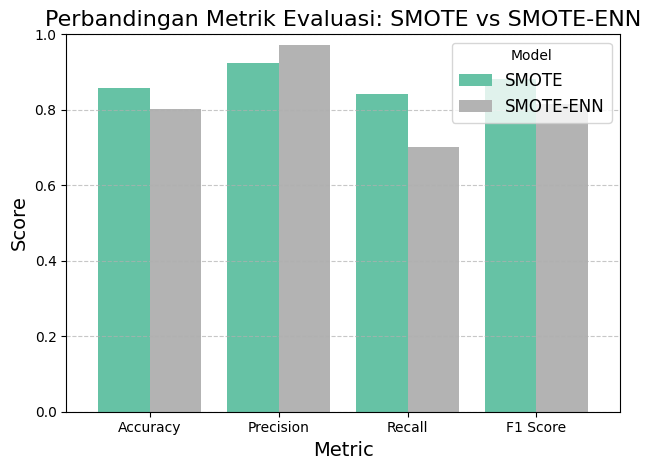

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data evaluasi model SMOTE
metrics_smote = {
    'Accuracy': accuracy_score(y_test, predicted_smote),
    'Precision': precision_score(y_test, predicted_smote, average="binary", pos_label="positif"),
    'Recall': recall_score(y_test, predicted_smote, average="binary", pos_label="positif"),
    'F1 Score': f1_score(y_test, predicted_smote, average="binary", pos_label="positif")
}

# Data evaluasi model SMOTE-ENN
metrics_smote_enn = {
    'Accuracy': accuracy_score(y_test, predicted_smote_enn),
    'Precision': precision_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"),
    'Recall': recall_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"),
    'F1 Score': f1_score(y_test, predicted_smote_enn, average="binary", pos_label="positif")
}

# Menggabungkan data evaluasi
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'SMOTE': list(metrics_smote.values()),
    'SMOTE-ENN': list(metrics_smote_enn.values())
}

# Mengubah ke dataframe
import pandas as pd
df_metrics = pd.DataFrame(metrics_data)

# Membuat bar chart
plt.figure(figsize=(10, 6))
df_metrics.set_index('Metric').plot(kind='bar', rot=0, colormap='Set2', width=0.8)

plt.title('Perbandingan Metrik Evaluasi: SMOTE vs SMOTE-ENN', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan chart
plt.show()

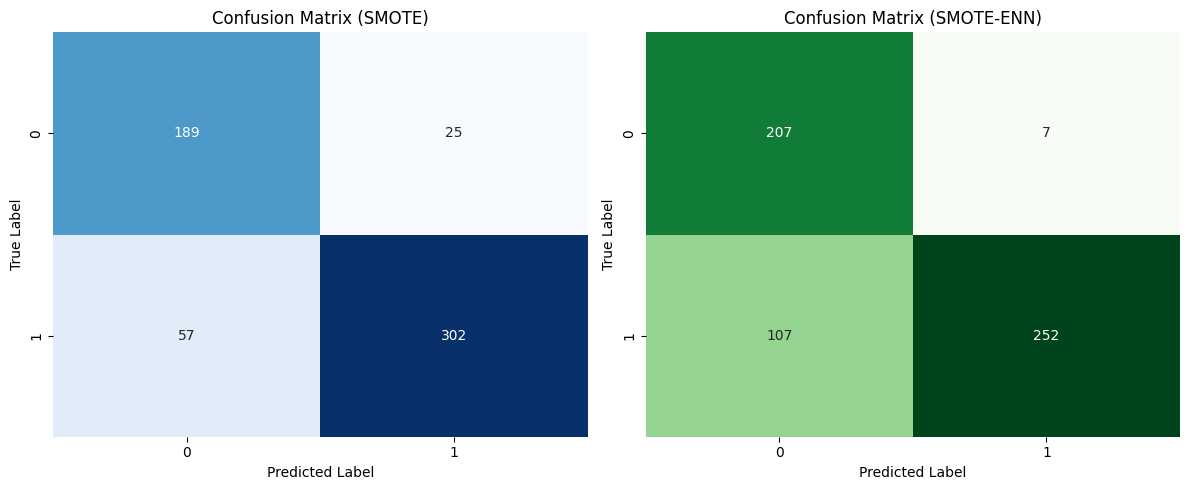

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix untuk model SMOTE
cm_smote = confusion_matrix(y_test, predicted_smote)

# Confusion matrix untuk model SMOTE-ENN
cm_smote_enn = confusion_matrix(y_test, predicted_smote_enn)

# Plot heatmap untuk SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Heatmap pertama untuk SMOTE
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot heatmap untuk SMOTE-ENN
plt.subplot(1, 2, 2)  # Heatmap kedua untuk SMOTE-ENN
sns.heatmap(cm_smote_enn, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix (SMOTE-ENN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

C:\Temp\ipykernel_6496\166803380.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), palette="viridis")
C:\Temp\ipykernel_6496\166803380.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), palette="viridis")
C:\Temp\ipykernel_6496\166803380.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(Counter(y_resampled_enn).keys()), y=list(Counter(y_resampled_enn).values()), palette="viridis")


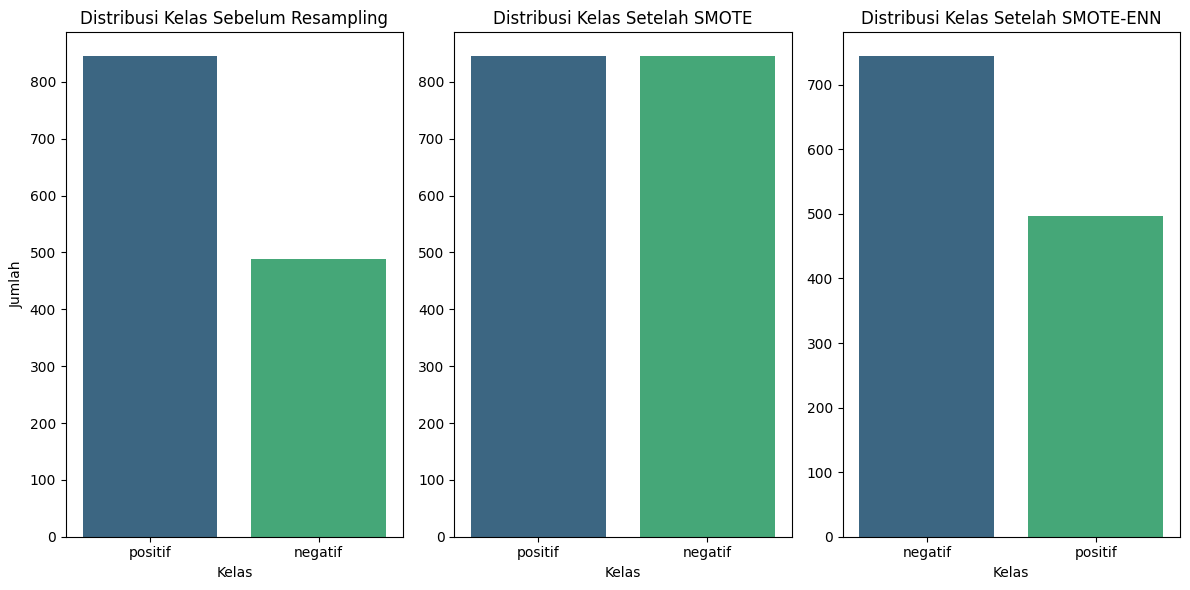

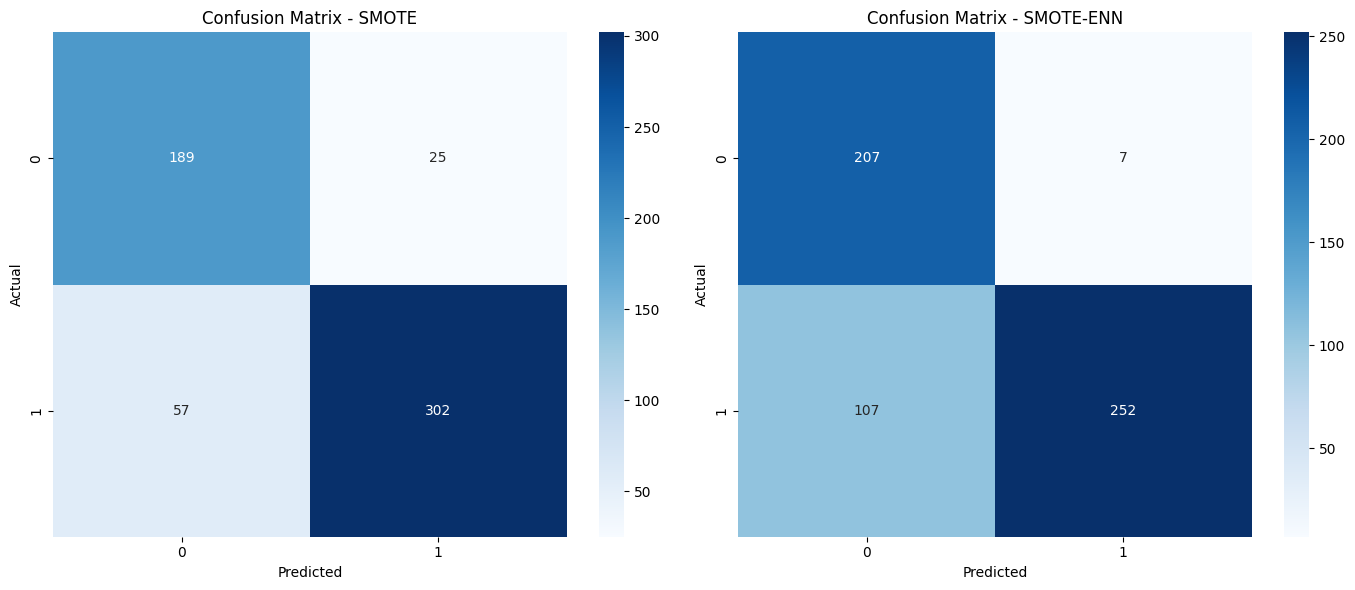

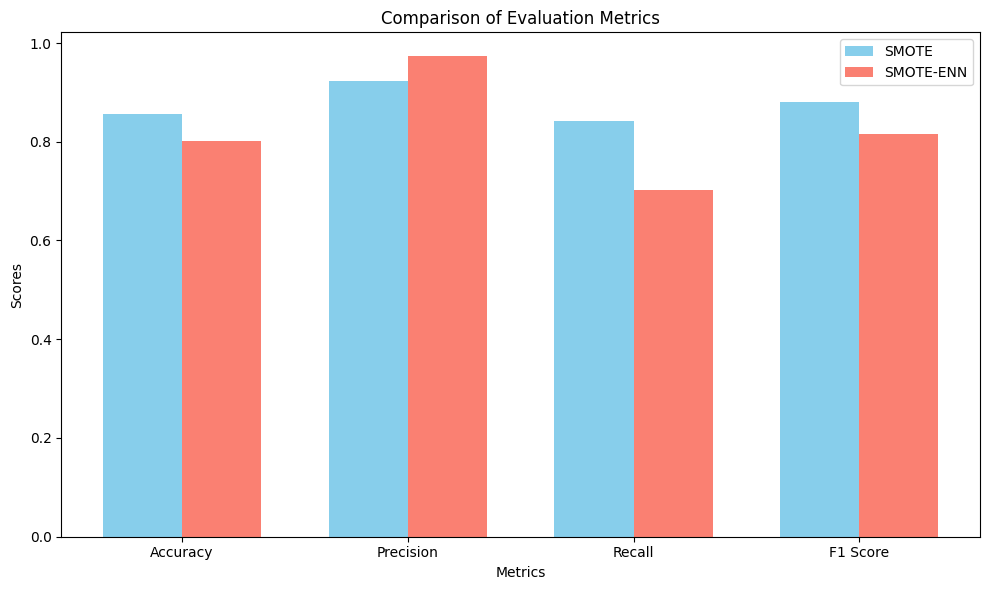

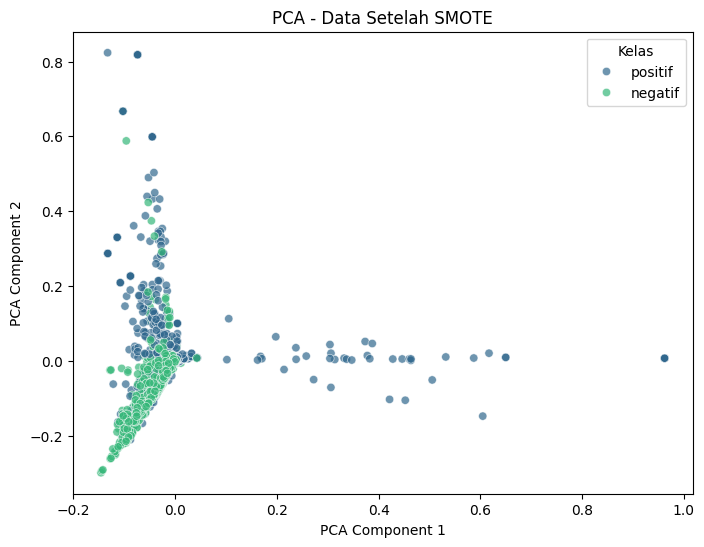

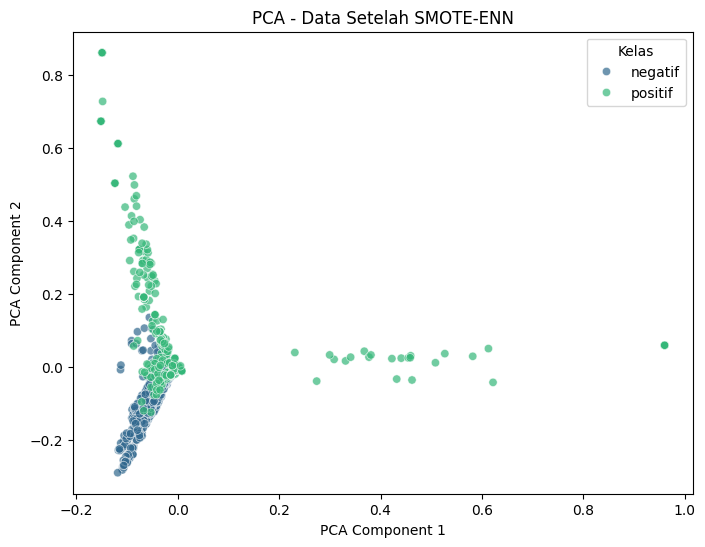

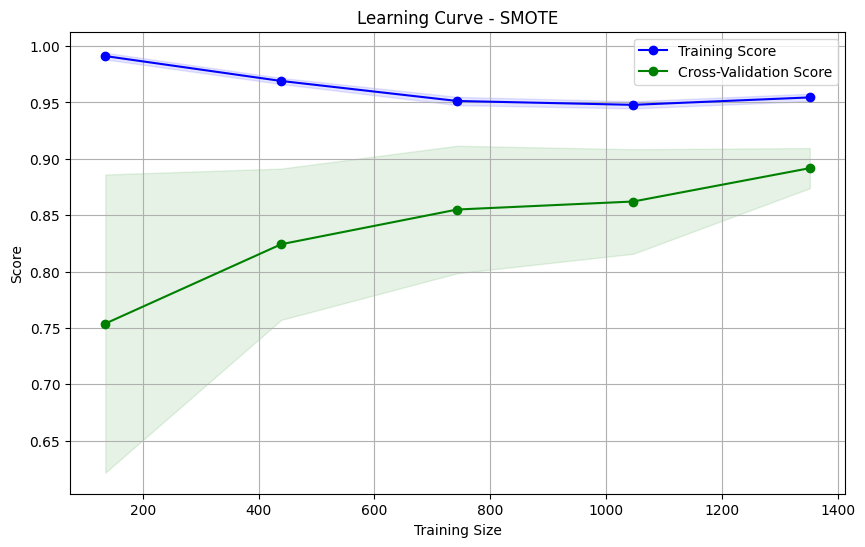

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
from wordcloud import WordCloud

# 1. Visualisasi Distribusi Kelas Sebelum dan Setelah Resampling
plt.figure(figsize=(12, 6))

# Sebelum Resampling
plt.subplot(1, 3, 1)
sns.barplot(x=list(Counter(y_train).keys()), y=list(Counter(y_train).values()), palette="viridis")
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

# Setelah SMOTE
plt.subplot(1, 3, 2)
sns.barplot(x=list(Counter(y_resampled).keys()), y=list(Counter(y_resampled).values()), palette="viridis")
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas')

# Setelah SMOTE-ENN
plt.subplot(1, 3, 3)
sns.barplot(x=list(Counter(y_resampled_enn).keys()), y=list(Counter(y_resampled_enn).values()), palette="viridis")
plt.title('Distribusi Kelas Setelah SMOTE-ENN')
plt.xlabel('Kelas')

plt.tight_layout()
plt.show()

# 2. Confusion Matrix untuk SMOTE dan SMOTE-ENN
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix SMOTE
sns.heatmap(confusion_matrix(y_test, predicted_smote), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - SMOTE")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion Matrix SMOTE-ENN
sns.heatmap(confusion_matrix(y_test, predicted_smote_enn), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE-ENN")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 3. Perbandingan Metrik Evaluasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
smote_scores = [
    accuracy_score(y_test, predicted_smote),
    precision_score(y_test, predicted_smote, average="binary", pos_label="positif"),
    recall_score(y_test, predicted_smote, average="binary", pos_label="positif"),
    f1_score(y_test, predicted_smote, average="binary", pos_label="positif")
]

smote_enn_scores = [
    accuracy_score(y_test, predicted_smote_enn),
    precision_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"),
    recall_score(y_test, predicted_smote_enn, average="binary", pos_label="positif"),
    f1_score(y_test, predicted_smote_enn, average="binary", pos_label="positif")
]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Bar untuk SMOTE dan SMOTE-ENN
ax.bar(x - width/2, smote_scores, width, label='SMOTE', color='skyblue')
ax.bar(x + width/2, smote_enn_scores, width, label='SMOTE-ENN', color='salmon')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

# 4. PCA untuk Visualisasi Data
# Visualisasi data setelah SMOTE
pca = PCA(n_components=2)
X_resampled_pca = pca.fit_transform(X_resampled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled_pca[:, 0], y=X_resampled_pca[:, 1], hue=y_resampled, palette='viridis', alpha=0.7)
plt.title('PCA - Data Setelah SMOTE')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Kelas')
plt.show()

# Visualisasi data setelah SMOTE-ENN
X_resampled_enn_pca = pca.fit_transform(X_resampled_enn)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled_enn_pca[:, 0], y=X_resampled_enn_pca[:, 1], hue=y_resampled_enn, palette='viridis', alpha=0.7)
plt.title('PCA - Data Setelah SMOTE-ENN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Kelas')
plt.show()

# 5. Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf_smote, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)

# Rata-rata dan standar deviasi
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-Validation Score')

# Area untuk standar deviasi
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title('Learning Curve - SMOTE')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

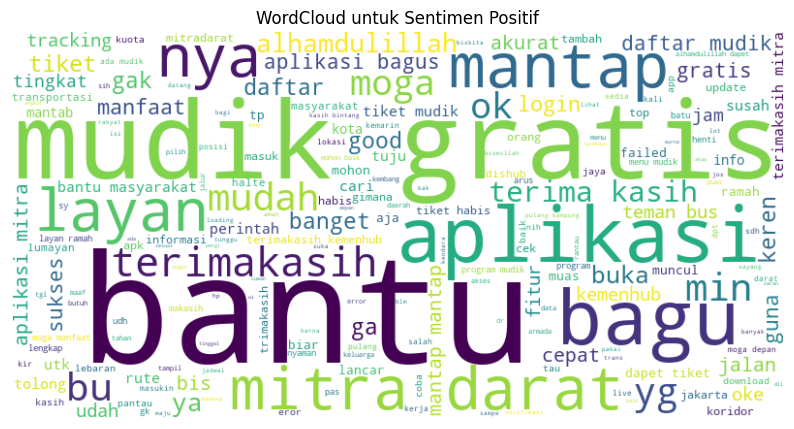

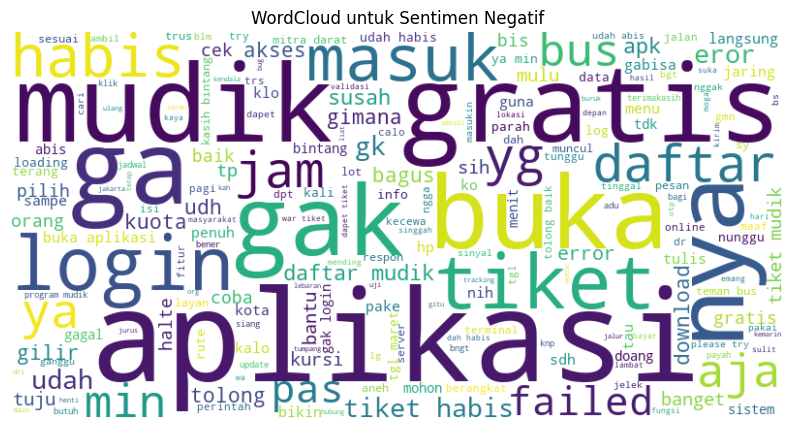

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mengganti nilai float (NaN) dengan string kosong dan memastikan semua nilai bertipe string
data['content'] = data['content'].fillna("").astype(str)

# Ambil teks dari data latih berdasarkan label positif dan negatif
positive_text = " ".join(data[data['sentiment_label'] == 'positif']['content'])
negative_text = " ".join(data[data['sentiment_label'] == 'negatif']['content'])

# WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# WordCloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Tampilkan WordCloud untuk positif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Sentimen Positif')
plt.show()

# Tampilkan WordCloud untuk negatif
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud untuk Sentimen Negatif')
plt.show()
